## Plots showing WSU data properties

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, QTable
import astropy.units as u
import pandas as pd
import pickle
from importlib import reload
import wsu_plots

## read in data files

In [2]:
# fix up custom units
gvis = u.def_unit('Gvis',namespace=globals())
u.add_enabled_units([gvis])

In [3]:
# update after first revisions of impact statement
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20230420.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20230420.ecsv')

In [4]:
wsu_all = vstack([result_c7_mous,result_c8_mous])

In [5]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [6]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_

In [7]:
# per MOUS/src
result_c7_mous_src = Table.read('data/wsu_datarates_per_mous_src_cycle7_20230420.ecsv')
result_c8_mous_src = Table.read('data/wsu_datarates_per_mous_src_cycle8_20230420.ecsv')

In [8]:
wsu_all_src = vstack([result_c7_mous_src,result_c8_mous_src])

In [9]:
wsu_all_src.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','b

In [10]:
# original Cycle 7 and Cycle 8 data
cycle7tab = Table.read('data/result_table_cycle7_with_calc_values_20220923.csv')
cycle8tab = Table.read('data/result_table_cycle8_with_calc_values_20220923.csv')

In [11]:
cycle7_cycle8_orig = vstack([cycle7tab,cycle8tab])

In [12]:
cycle7_cycle8_orig.columns

<TableColumns names=('obs_publisher_did','facility_name','instrument_name','obs_id','dataproduct_type','calib_level','target_name','s_ra','s_dec','s_fov','s_resolution','t_min','t_max','t_exptime','t_resolution','em_min','em_max','em_res_power','pol_states','o_ucd','access_url','access_format','proposal_id','data_rights','gal_longitude','gal_latitude','band_list','em_resolution','bandwidth','antenna_arrays','is_mosaic','spatial_resolution','frequency_support','frequency','velocity_resolution','publication_year','proposal_abstract','schedblock_name','sensitivity_10kms','cont_sensitivity_bandwidth','pwv','group_ous_uid','member_ous_uid','asdm_uid','type','scan_intent','science_observation','spatial_scale_max','qa2_passed','science_keyword','scientific_category','collections','array','points_per_fov','spw_freq','spw_specwidth','spw_nchan','pb','cell','imsize','spw_nchan_max','mitigated','failed_mitigation_nbin1','failed_mitigation_nbin2','ntarget')>

## Plot cube sizes

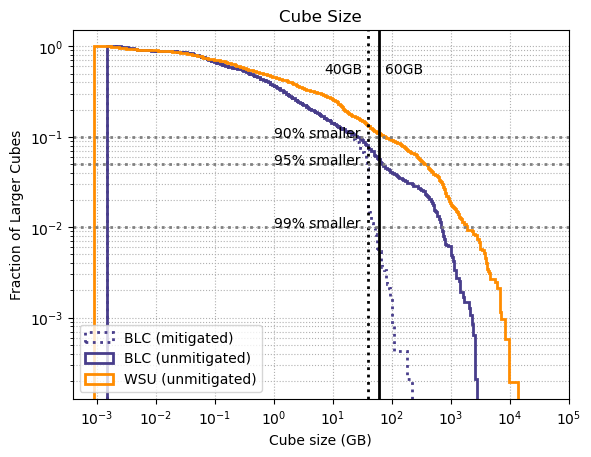

In [13]:
reload(wsu_plots)
wsu_plots.plot_cubesize_comparison(wsu_all,
                                   figname='plots/cubesize_distribution.png')

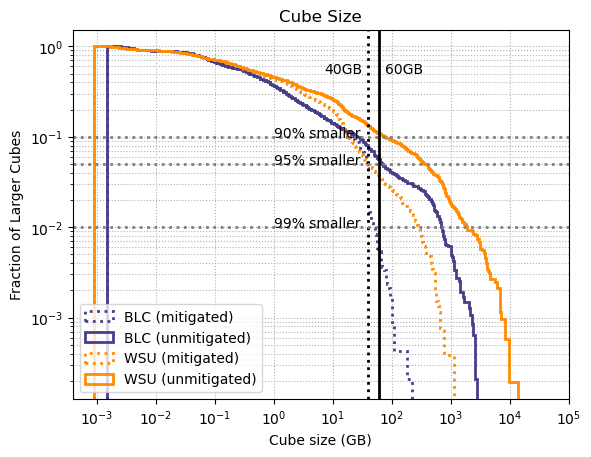

In [14]:
reload(wsu_plots)
wsu_plots.plot_cubesize_comparison(wsu_all,
                                   mitigated_wsu=True,
                                   figname='plots/cubesize_distribution_mitigatedwsu.png')

In [15]:
np.max(wsu_all['wsu_cubesize_stepped2']).to('TB')

<Quantity 14.09039169 Tbyte>

In [16]:
bin_max=14 #TB
nbin=100

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1079: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))


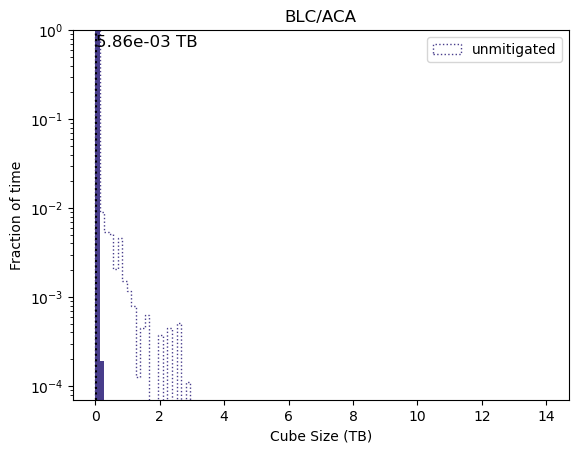

In [17]:
reload(wsu_plots)
wsu_plots.plot_cubesize_result_hist(wsu_all,
                                    bin_min=0, bin_max=bin_max, nbin=nbin,
                                    data_val='mitigatedcubesize',
                                    title='BLC/ACA',
                                    add_wavg=True,
                                    pltname='plots/cubesize_blc.png')

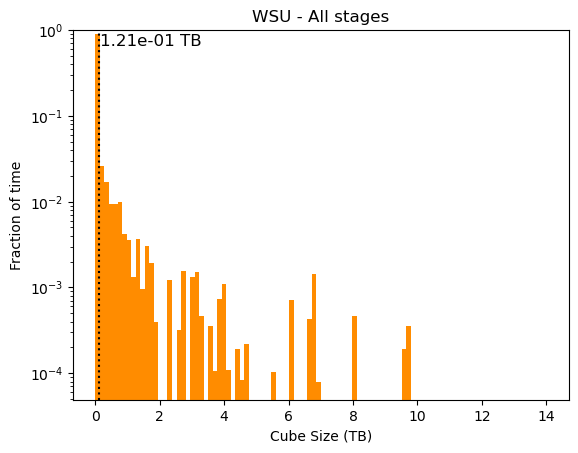

In [18]:
reload(wsu_plots)
wsu_plots.plot_cubesize_result_hist(wsu_all,
                                    bin_min=0, bin_max=bin_max, nbin=nbin,
                                    data_val='wsu_cubesize_stepped2',
                                    title='WSU - All stages',
                                    add_wavg=True,
                                    pltname='plots/cubesize_wsu.png')

In [19]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (1.7, 5.9)
log_nchan_step = 0.1

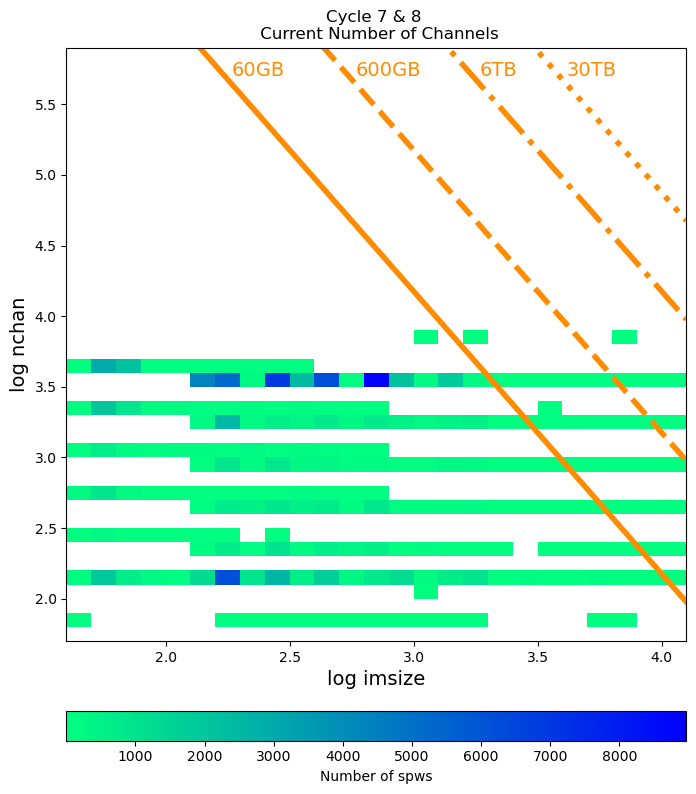

In [57]:
## This uses the original mous/src/spw database. The total number of rows = src * spw
reload(wsu_plots)
h_current, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(cycle7_cycle8_orig, 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels',
                                                            cmap='winter_r',
                                                            band2_specscan=False,
                                                            mit_limits=True,
                                                            pltname='plots/density_plot_nolines.png')

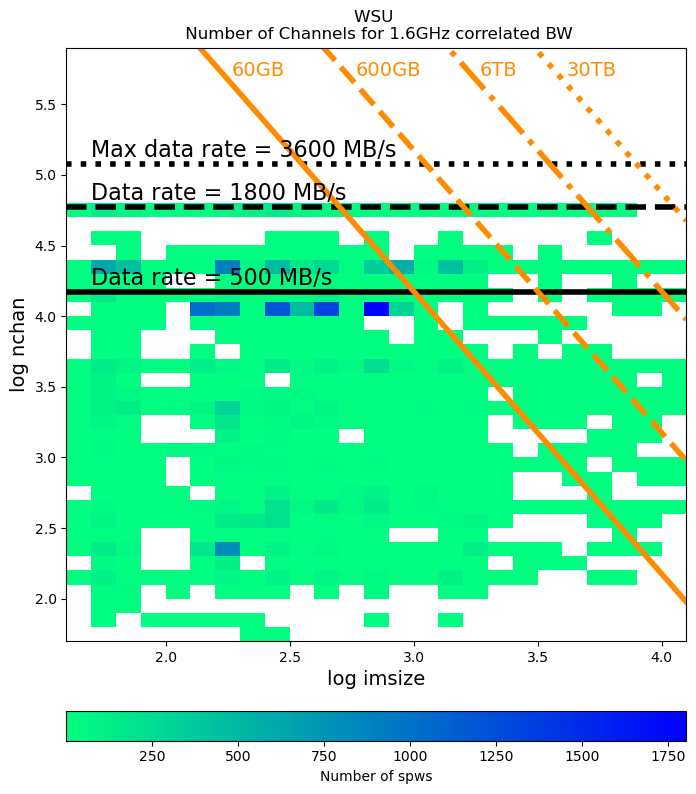

In [21]:
# This version doesn't have any weights so it's number of srcs
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU \n Number of Channels for 1.6GHz correlated BW',
                                                                cmap='winter_r',
                                                                band2_specscan=True,nspw=10,
                                                                pltname='plots/density_plot_wsu_spw.png')

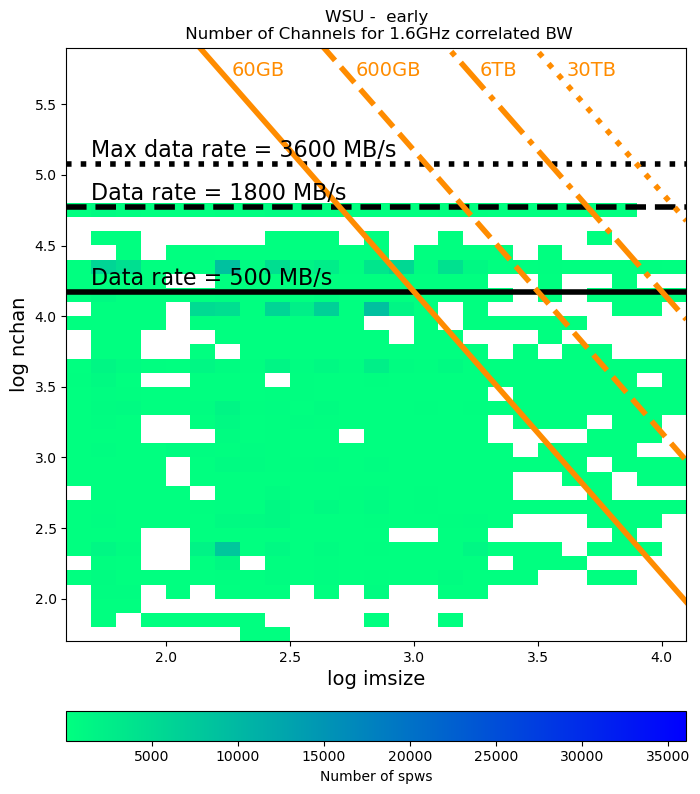

In [22]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU -  early\n Number of Channels for 1.6GHz correlated BW',
                                                                cmap='winter_r',vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=10,
                                                                myweights=wsu_all_src['wsu_nspw_early'],
                                                                pltname='plots/density_plot_wsu_spw_early.png')

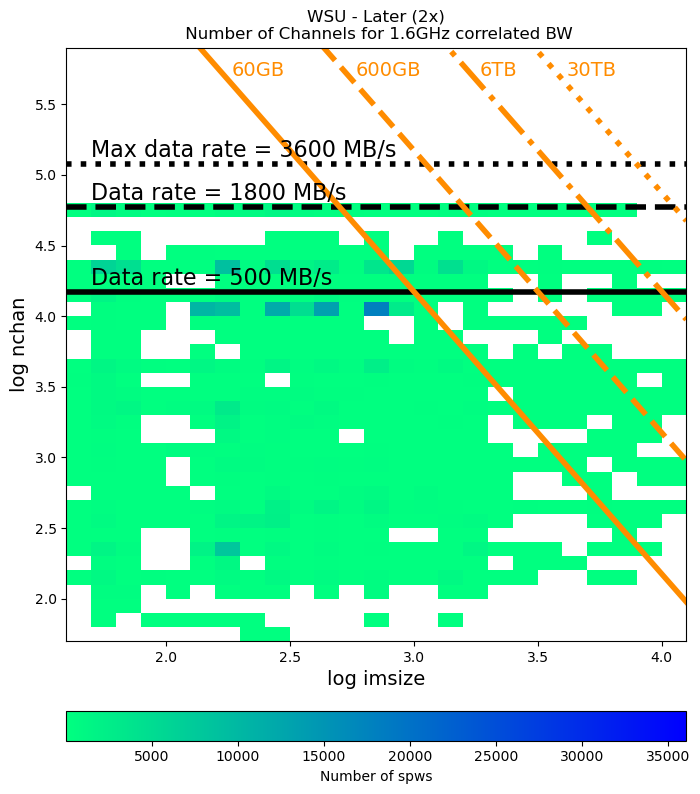

In [23]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU - Later (2x)\n Number of Channels for 1.6GHz correlated BW',
                                                                cmap='winter_r',vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=10,
                                                                myweights=wsu_all_src['wsu_nspw_later_2x'],
                                                                pltname='plots/density_plot_wsu_spw_later_2x.png')

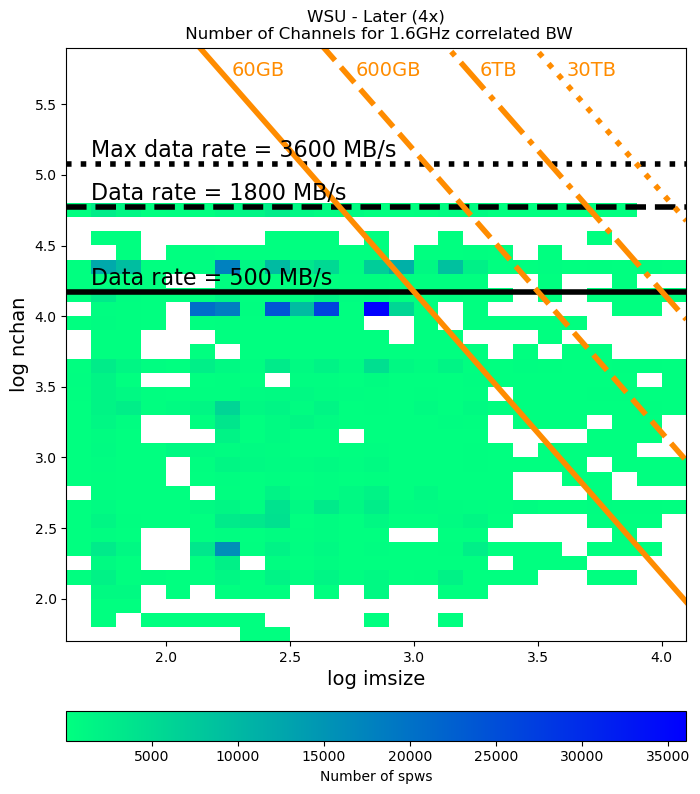

In [24]:
reload(wsu_plots)
h_wsu_spw, xedges, yedges = wsu_plots.make_imsize_vs_nchan_hist2d(wsu_all_src, 
                                                                chan_type='wsu_nchan_spw_stepped2',
                                                                log_imsize_range = log_imsize_range, 
                                                                log_imsize_step = log_imsize_step,
                                                                log_nchan_range = log_nchan_range,
                                                                log_nchan_step = log_nchan_step, 
                                                                title = 'WSU - Later (4x)\n Number of Channels for 1.6GHz correlated BW',
                                                                cmap='winter_r', vmin=20, vmax=36080.0,
                                                                band2_specscan=True,nspw=10,
                                                                myweights=wsu_all_src['wsu_nspw_later_4x'],
                                                                pltname='plots/density_plot_wsu_spw_later_4x.png')

In [25]:
np.nanmin(h_wsu_spw)

20.0

In [26]:
np.nanmax(h_wsu_spw)

36080.0

## Plot nspws

In [27]:
np.max(wsu_all['wsu_nspw_later_4x'])

20

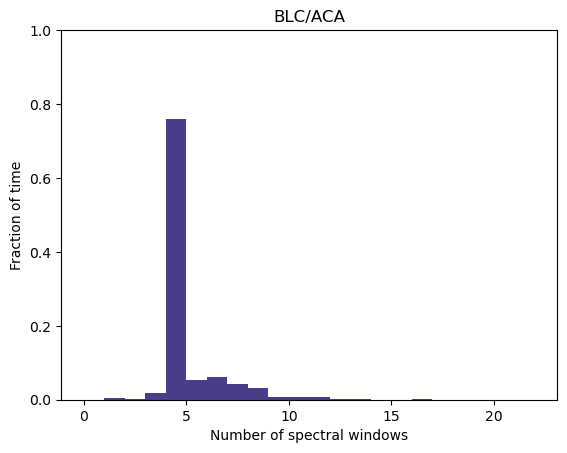

In [28]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='blc_nspw',
                       title='BLC/ACA',
                       pltname='plots/nspw_blc.png')

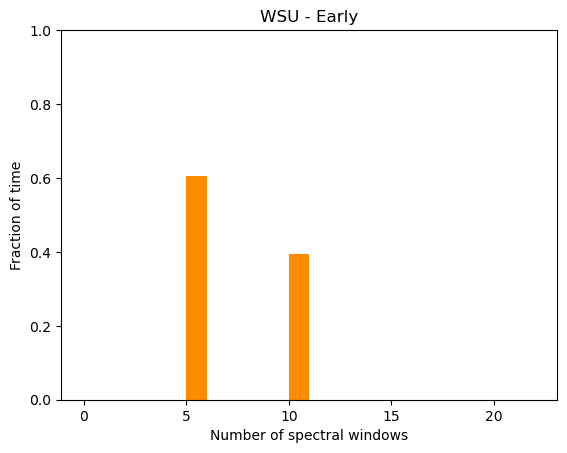

In [29]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='wsu_nspw_early',
                       title='WSU - Early',
                       pltname='plots/nspw_early.png')

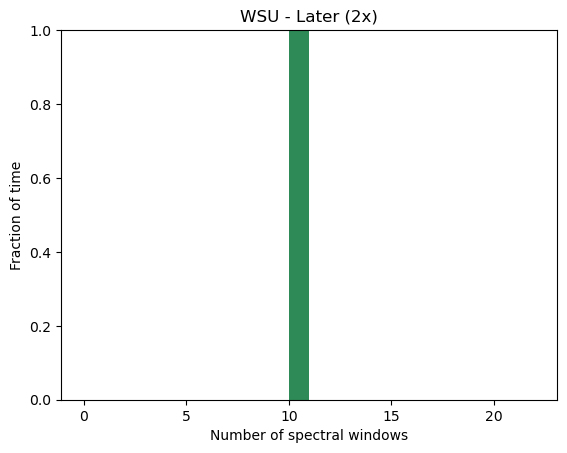

In [30]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='wsu_nspw_later_2x',
                       title='WSU - Later (2x)',
                       pltname='plots/nspw_later_2x.png')

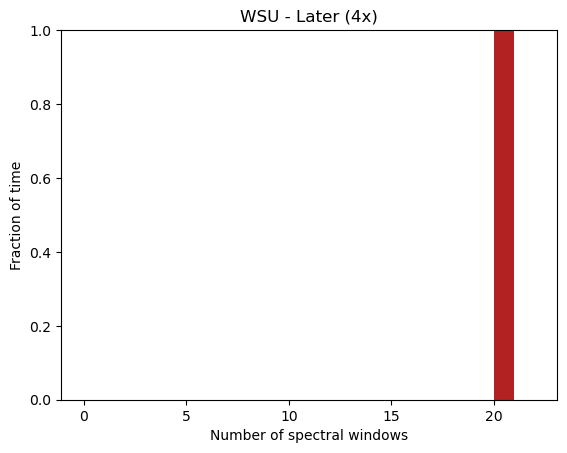

In [31]:
reload(wsu_plots)
wsu_plots.plot_spw_hist(wsu_all,bin_min=0,bin_max=22,nbin=22,data_val='wsu_nspw_later_4x',
                       title='WSU - Later (4x)',
                       pltname='plots/nspw_later_4x.png')

## plot productsizes

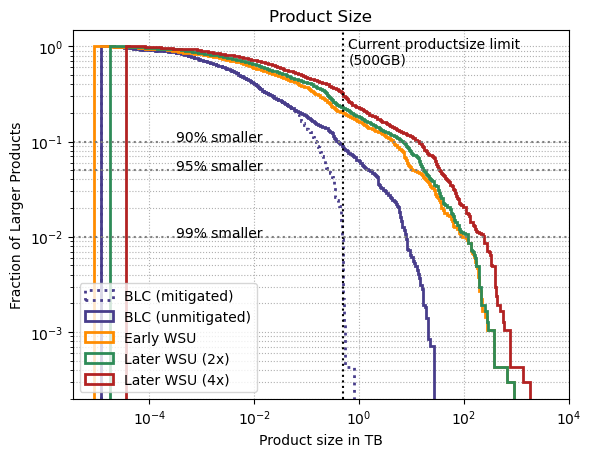

In [32]:
reload(wsu_plots)
wsu_plots.plot_productsize_comparison(wsu_all,figname='plots/productsize_distribution.png')

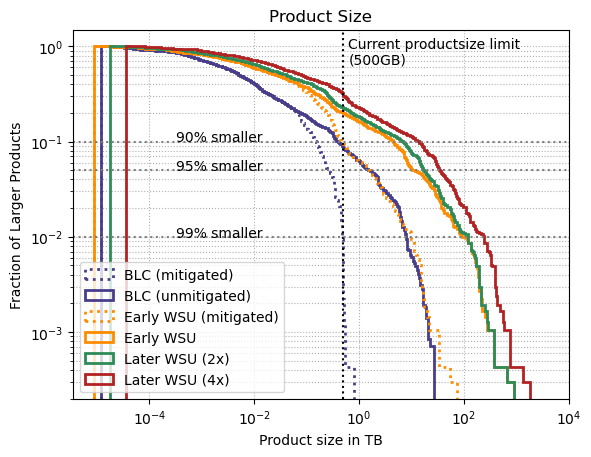

In [33]:
reload(wsu_plots)
wsu_plots.plot_productsize_comparison(wsu_all,
                                      mitigated_wsu=True,
                                      figname='plots/productsize_distribution_mitigatedwsu.png')

In [34]:
np.max(wsu_all['wsu_productsize_later_4x_stepped2'].to('TB'))

<Quantity 1854.84179264 Tbyte>

In [35]:
bin_max=2000
nbin=100

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1260: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


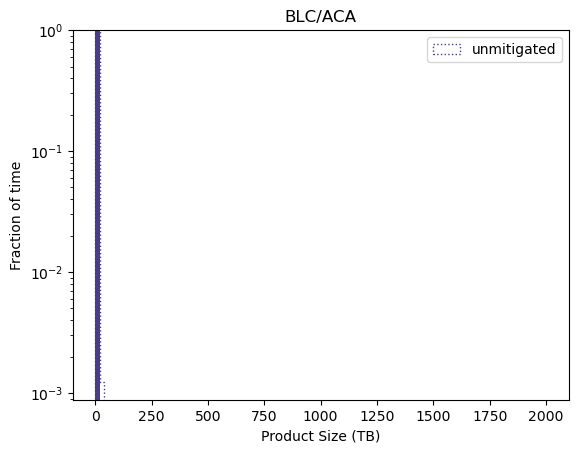

In [36]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='mitigatedprodsize',
                                       title='BLC/ACA',
                                       add_wavg=True,
                                      pltname='plots/productsize_blc.png')

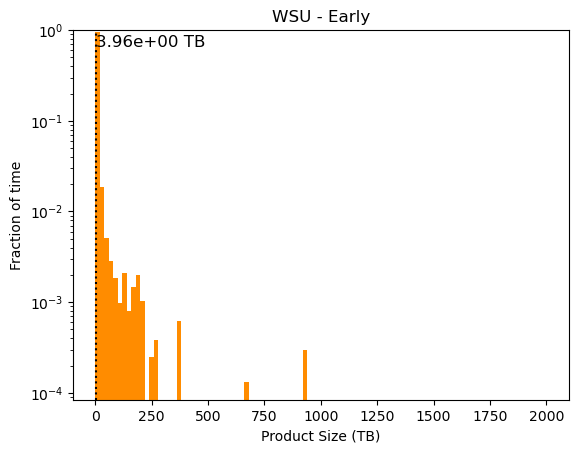

In [37]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_early_stepped2',
                                       title='WSU - Early',
                                       add_wavg=True,
                                      pltname='plots/productsize_early.png')

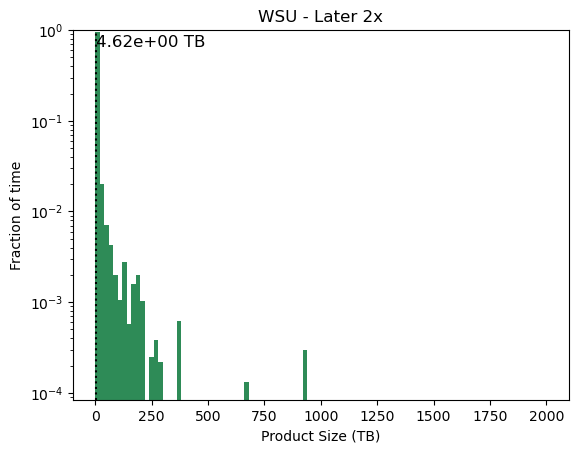

In [38]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_later_2x_stepped2',
                                       title='WSU - Later 2x',
                                       add_wavg=True,
                                      pltname='plots/productsize_later_2x.png')

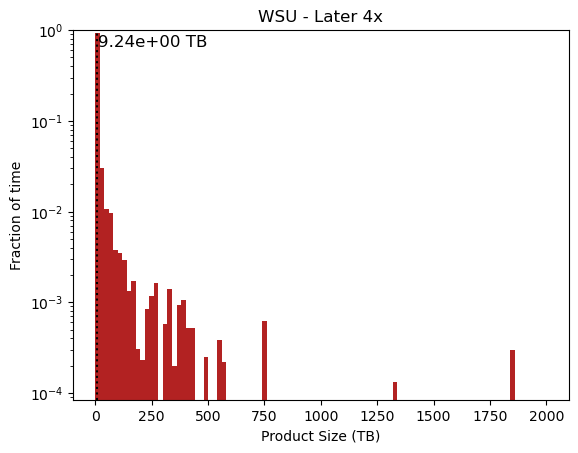

In [39]:
reload(wsu_plots)
wsu_plots.plot_productsize_result_hist(wsu_all,
                                      bin_min=0,bin_max=bin_max,nbin=nbin,
                                       data_val='wsu_productsize_later_4x_stepped2',
                                       title='WSU - Later 4x',
                                       add_wavg=True,
                                      pltname='plots/productsize_later_4x.png')

## plot increase in number of visibilities

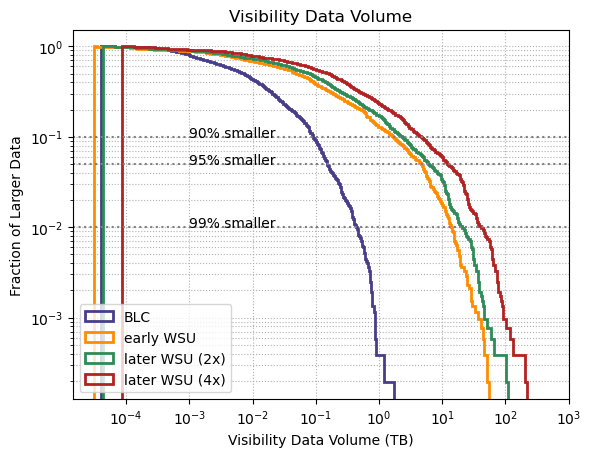

In [40]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison(wsu_all,figname='plots/datavol_distribution.png')

In [41]:
np.max(wsu_all['wsu_datavol_later_4x_stepped2_typical_total'].to('TB'))

<Quantity 218.28626277 Tbyte>

In [42]:
nbin=100
bin_max=250

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1588: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))


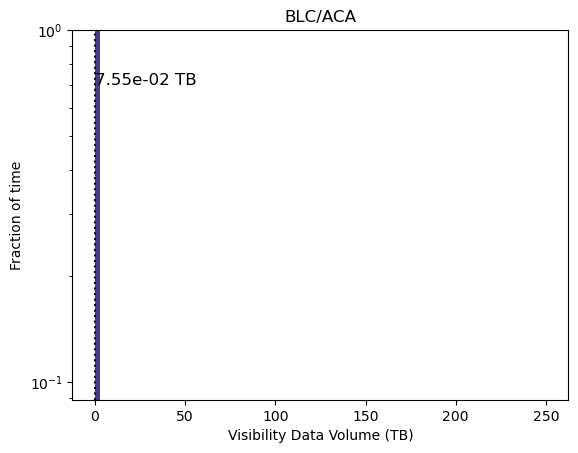

In [43]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                            nbin=nbin,
                            data_val = 'blc_datavol_typical_total',
                            title='BLC/ACA',
                            add_wavg=True,
                            pltname='plots/datavol_blc.png')

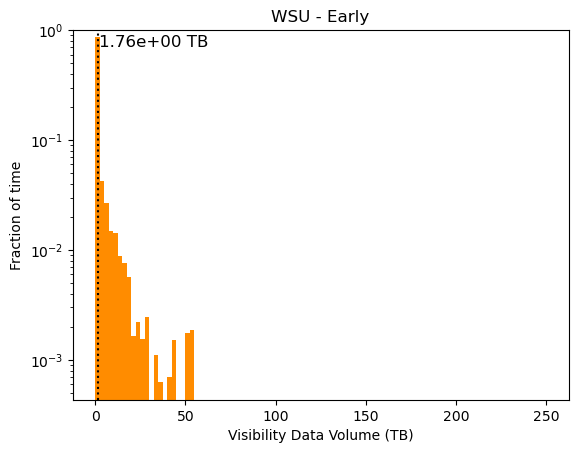

In [44]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                        nbin=nbin,
                        data_val = 'wsu_datavol_early_stepped2_typical_total',
                            title='WSU - Early',
                        add_wavg=True,
                                  pltname='plots/datavol_early.png')

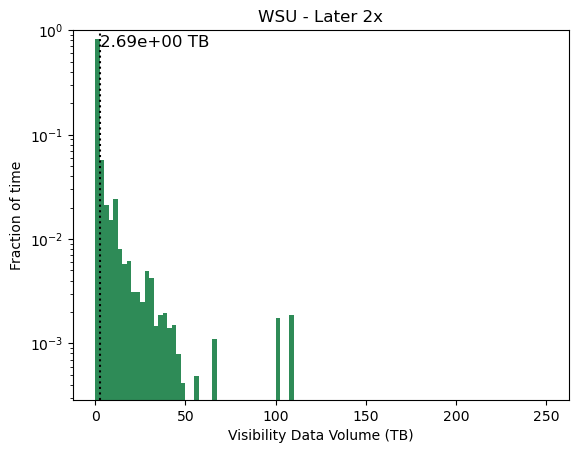

In [45]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                        nbin=nbin,
                        data_val = 'wsu_datavol_later_2x_stepped2_typical_total',
                            title='WSU - Later 2x',
                        add_wavg=True,
                                  pltname='plots/datavol_later_2x.png')

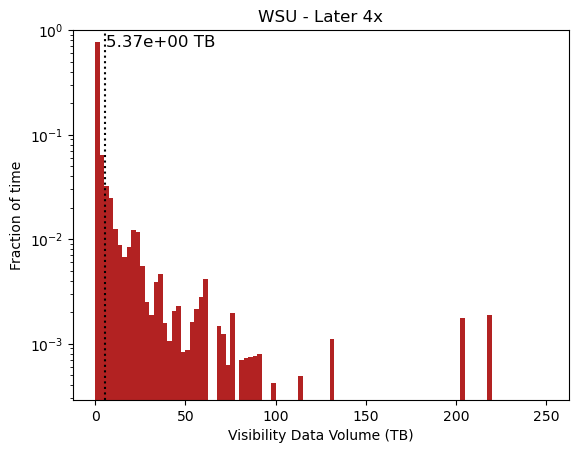

In [46]:
reload(wsu_plots)
wsu_plots.plot_datavol_result_hist(wsu_all,bin_min=0,bin_max=250,
                        nbin=nbin,
                        data_val = 'wsu_datavol_later_4x_stepped2_typical_total',
                            title='WSU - Later 4x',
                        add_wavg=True,
                                  pltname='plots/datavol_later_4x.png')

## plot data rate

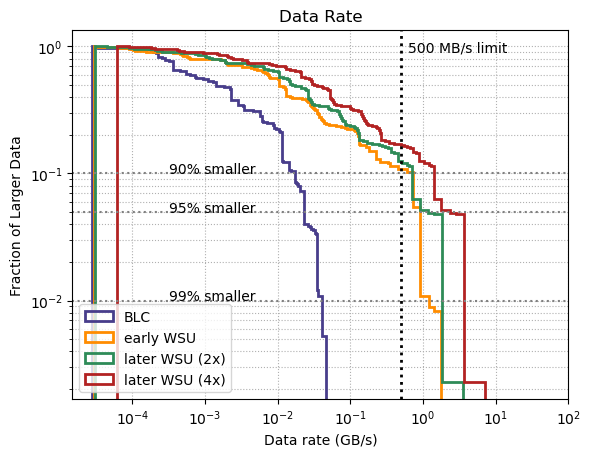

In [47]:
reload(wsu_plots)
wsu_plots.plot_datarate_comparison(wsu_all,figname='plots/datarate_distribution.png')

In [48]:
np.max(wsu_all['wsu_datarate_later_4x_stepped2_typical'])

<Quantity 7.07345524 Gbyte / s>

In [49]:
bin_max=7.2
nbin=100

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/wsu_plots.py:1747: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim((0,1))


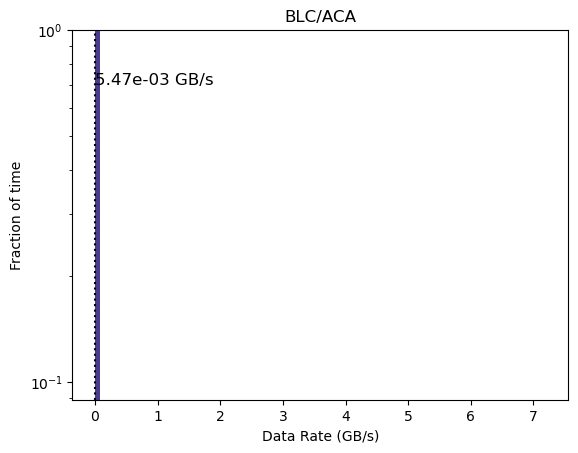

In [50]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'blc_datarate_typical',
                                   title='BLC/ACA',
                                   add_wavg=True,
                                   pltname='plots/datarate_blc.png')

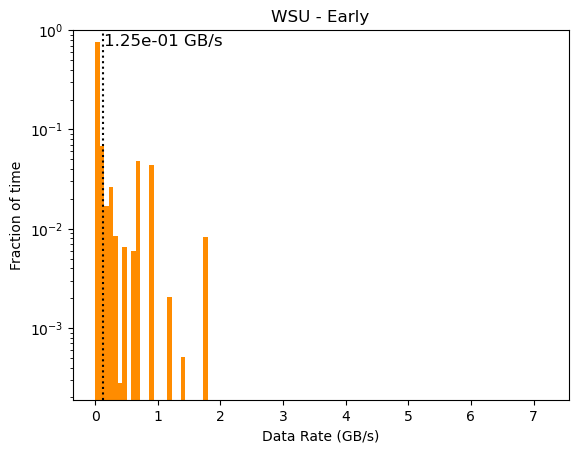

In [51]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'wsu_datarate_early_stepped2_typical',
                                   title='WSU - Early',
                                   add_wavg=True,
                                   pltname='plots/datarate_early.png')

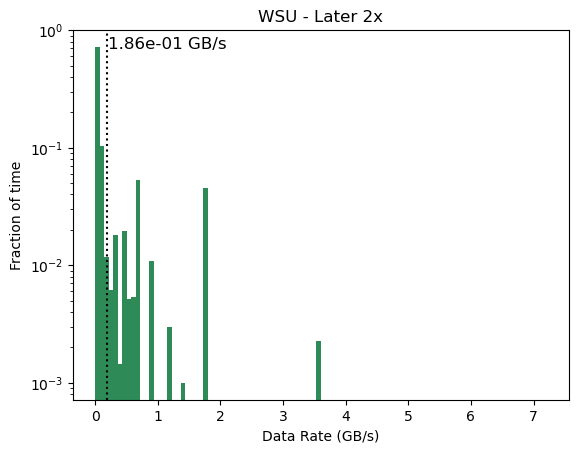

In [52]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'wsu_datarate_later_2x_stepped2_typical',
                                   title='WSU - Later 2x',
                                   add_wavg=True,
                                   pltname='plots/datarate_later_2x.png')

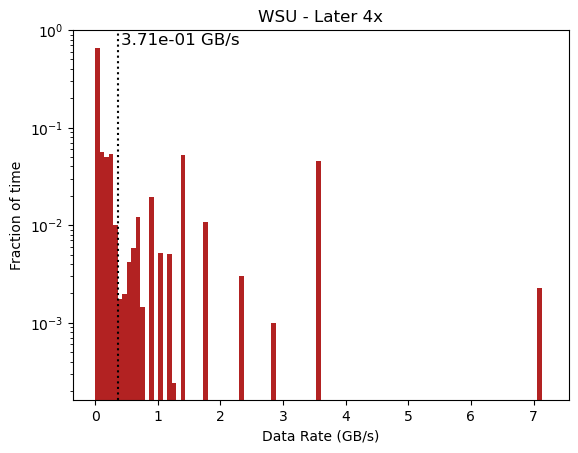

In [53]:
reload(wsu_plots)
wsu_plots.plot_datarate_result_hist(wsu_all,bin_min=0,bin_max=bin_max, nbin=nbin,
                                   data_val= 'wsu_datarate_later_4x_stepped2_typical',
                                   title='WSU - Later 4x',
                                   add_wavg=True,
                                   pltname='plots/datarate_later_4x.png')

# ratio of science to cal visibilities

In [59]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_

In [92]:
wsu_all['wsu_datavol_later_4x_stepped2_typical_cal']

<Quantity [3.6145824, 1.5320448, 1.5320448, ..., 2.9887488, 2.9670912,
           0.5873472] Gbyte>

In [89]:
np.max(wsu_all['wsu_datavol_early_stepped2_typical_cal'])

<Quantity nan Gbyte>

In [83]:
np.min(wsu_all['wsu_datavol_early_stepped2_typical_cal'].value)

nan

Text(0.5, 0, 'TB')

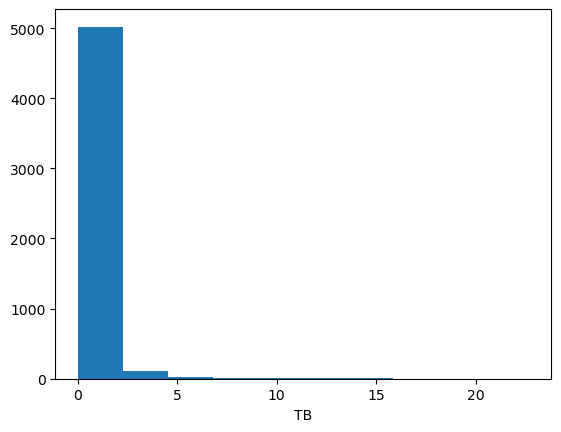

In [96]:
plt.hist(wsu_all['wsu_datavol_later_2x_stepped2_typical_cal'].to('TB').value)
plt.xlabel('TB')

Text(0.5, 0, 'TB')

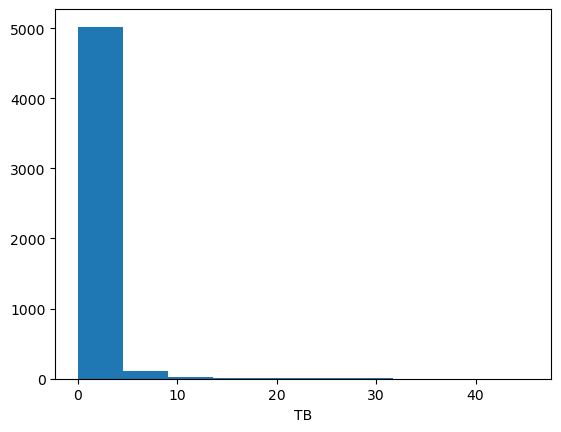

In [97]:
plt.hist(wsu_all['wsu_datavol_later_4x_stepped2_typical_cal'].to('TB').value)
plt.xlabel('TB')

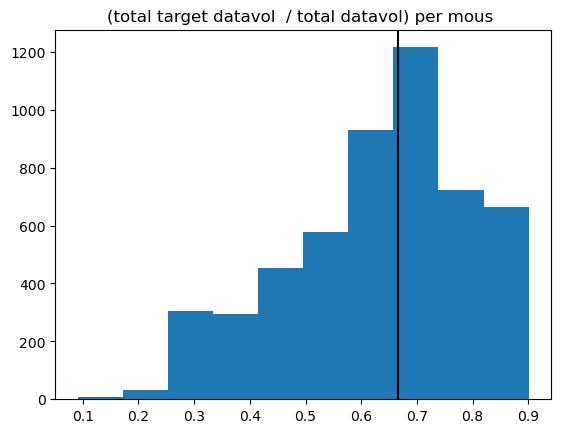

In [103]:
plt.hist(wsu_all['wsu_datavol_later_4x_stepped2_typical_target_tot'].to('TB').value
         /wsu_all['wsu_datavol_later_4x_stepped2_typical_total'].to('TB').value)
plt.title('(total target datavol  / total datavol) per mous ')
plt.axvline(2/3.0,color='black')

In [106]:
np.log10(np.max(wsu_all['wsu_nchan_spw_stepped2']))

<Quantity 4.77275432>